<a href="https://colab.research.google.com/github/vilacco/testovoe_classifier/blob/main/testovoe_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: обучить любой классификатор, получить ROC-AUC score больше 70.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/dataset.csv') 

In [4]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,0.141861,0.042065,0.022336,0.023745,0.025611,0.60000
std,5.433073,5.389536,5.422549,5.340603,5.434483,0.48998
min,-12.936886,-12.810592,-13.454282,-13.194904,-13.433194,0.00000
25%,-4.095531,-4.044539,-4.101664,-4.076794,-3.951466,0.00000
50%,0.182078,0.082622,-0.024358,0.068921,0.032573,1.00000
75%,4.213366,4.009051,4.095432,4.136638,4.312101,1.00000
max,13.093660,13.866223,13.907629,13.360422,13.649220,1.00000


In [5]:
df.target.mean()

0.6

In [6]:
! pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [8]:
train0  = df.sample(frac = 0.7, random_state = 42).copy()


In [11]:
test = df[~df.index.isin(train.index)].copy()

In [12]:
train = train0.sample(frac = 0.7, random_state = 42).copy()
validation = train0[~train0.index.isin(train.index)].copy()

In [13]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

In [14]:
X_ = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
Y_ = ['target']

In [15]:
from catboost import CatBoostClassifier

In [16]:
model = CatBoostClassifier(verbose=40, eval_metric='AUC')

In [17]:
model.fit(train[X_], train[Y_], eval_set = (validation[X_],validation[Y_]))

Learning rate set to 0.034853
0:	test: 0.4955604	best: 0.4955604 (0)	total: 49.6ms	remaining: 49.6s
40:	test: 0.4969478	best: 0.4969478 (40)	total: 146ms	remaining: 3.42s
80:	test: 0.4964085	best: 0.5055809 (62)	total: 240ms	remaining: 2.73s
120:	test: 0.4960211	best: 0.5055809 (62)	total: 344ms	remaining: 2.5s
160:	test: 0.5029213	best: 0.5055809 (62)	total: 437ms	remaining: 2.28s
200:	test: 0.5019580	best: 0.5055809 (62)	total: 536ms	remaining: 2.13s
240:	test: 0.5033611	best: 0.5057485 (237)	total: 636ms	remaining: 2s
280:	test: 0.5031622	best: 0.5057485 (237)	total: 727ms	remaining: 1.86s
320:	test: 0.5006387	best: 0.5057485 (237)	total: 814ms	remaining: 1.72s
360:	test: 0.5048689	best: 0.5057485 (237)	total: 910ms	remaining: 1.61s
400:	test: 0.5055809	best: 0.5070573 (388)	total: 1s	remaining: 1.5s
440:	test: 0.5027748	best: 0.5070573 (388)	total: 1.09s	remaining: 1.39s
480:	test: 0.5043349	best: 0.5070573 (388)	total: 1.19s	remaining: 1.29s
520:	test: 0.5047328	best: 0.5070573 (3

In [18]:
test['y_score'] = model.predict_proba(test[X_])[:,1]

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
roc_auc_score(test['target'], test['y_score']) #жоска

0.5104139784946237

In [23]:
import seaborn as sns 

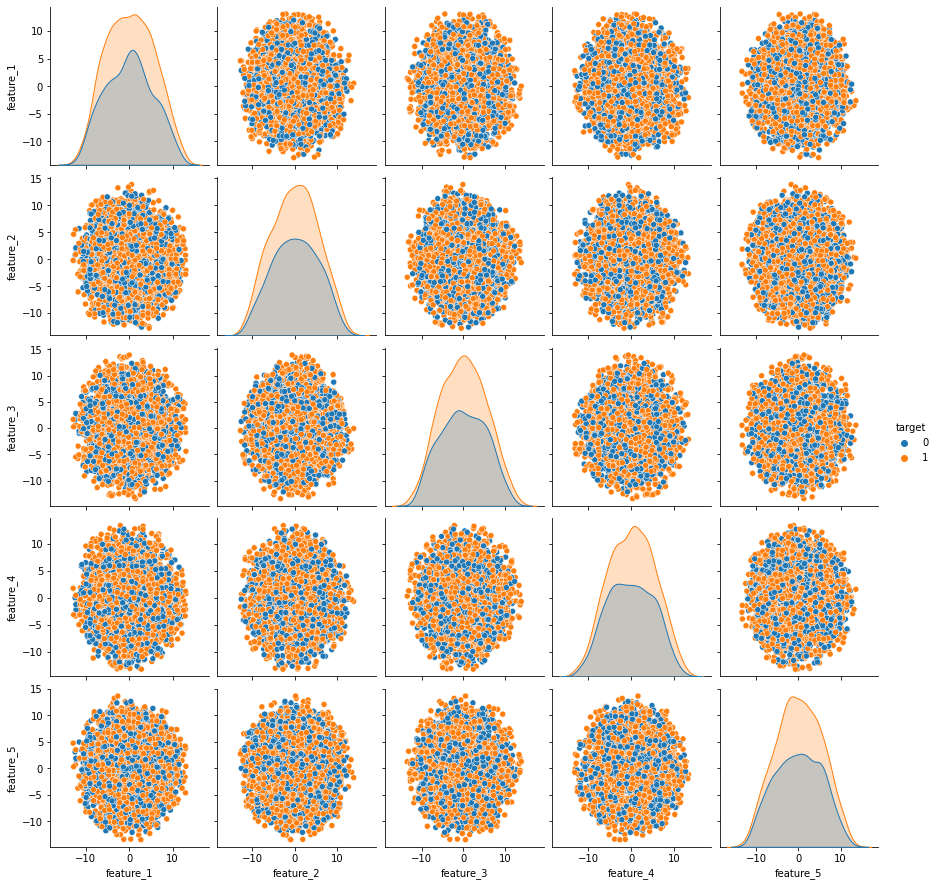

In [25]:
sns.pairplot(df, hue = 'target')

In [26]:
from sklearn.manifold import MDS

In [27]:
mds = MDS()

In [29]:
df_transform = mds.fit_transform(df[X_])

In [33]:
df_transform_ = pd.DataFrame(df_transform)

In [38]:
df_transform_['target'] = df['target'].values

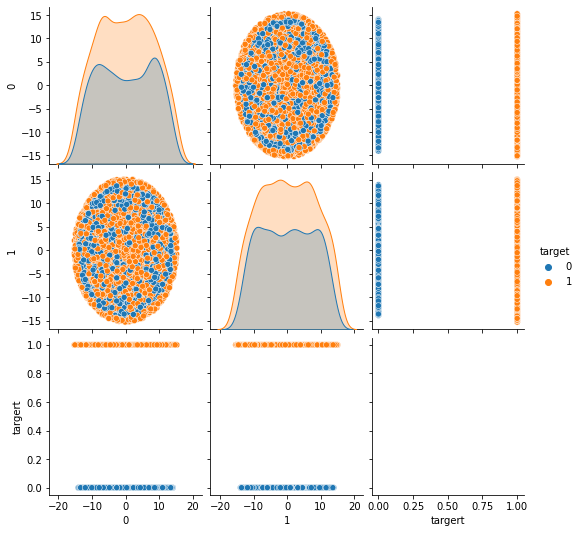

In [39]:
sns.pairplot(df_transform_, hue = 'target')

*подсказка про кластеризацию по расстояниям*

In [70]:
df['distance'] = np.round(np.sqrt(df['feature_1']**2 + df['feature_2']**2 +
                    df['feature_3']**2 +df['feature_4']**2 +df['feature_5']**2))

In [71]:
df.groupby('distance')['target'].mean()

distance
10.0    1
11.0    0
12.0    1
13.0    0
14.0    1
Name: target, dtype: int64

In [72]:
from sklearn.svm import SVC

In [79]:
svclassifier = SVC(kernel = 'poly', degree = 2,  probability = True)

In [80]:
svclassifier.fit(train[X_], train[Y_])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
test['y_svc_score'] = svclassifier.predict_proba(test[X_])[:,1]

In [83]:
roc_auc_score(test['target'], test['y_svc_score'])

0.5290609318996415